In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Dataset .csv")

# **Task 1 - Votes Analysis**

# **Restaurants with Highest & Lowest Votes**

In [3]:
# Drop missing vote values
votes_df = df.dropna(subset=['Votes'])

# Restaurant with highest votes
highest_votes = votes_df.loc[votes_df['Votes'].idxmax()]
highest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']]


,728
Restaurant Name,Toit
Votes,10934
Aggregate rating,4.8


In [4]:
# Restaurant with lowest votes
lowest_votes = votes_df.loc[votes_df['Votes'].idxmin()]
lowest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']]

,69
Restaurant Name,Cantinho da Gula
Votes,0
Aggregate rating,0.0


# **Relationship Between Votes & Ratings**

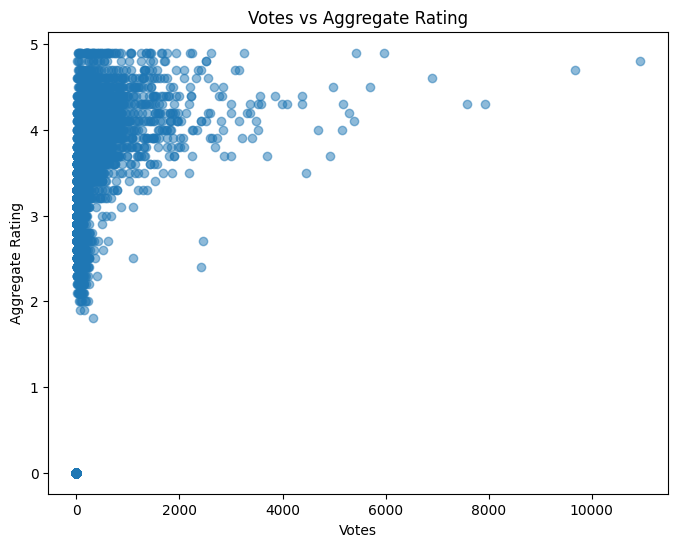

In [5]:
# Remove rows with missing ratings
votes_rating_df = votes_df.dropna(subset=['Aggregate rating'])

# Scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    votes_rating_df['Votes'],
    votes_rating_df['Aggregate rating'],
    alpha=0.5
)

plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.title('Votes vs Aggregate Rating')
plt.show()


# **Correlation Calculation**

In [6]:
correlation = votes_rating_df['Votes'].corr(votes_rating_df['Aggregate rating'])
correlation


np.float64(0.31369058419541157)

The analysis identified restaurants with the highest and lowest customer engagement using vote counts. A scatter plot was used to examine the relationship between votes and ratings. The correlation coefficient indicates whether higher customer engagement is associated with better ratings.

# **Task 2 - Price Range vs Online Delivery & Table Booking**

In [7]:
df[['Price range', 'Has Online delivery', 'Has Table booking']].head()


,Price range,Has Online delivery,Has Table booking
0,3,No,Yes
1,3,No,Yes
2,4,No,Yes
3,4,No,No
4,4,No,Yes


In [8]:
service_df = df.dropna(subset=['Price range', 'Has Online delivery', 'Has Table booking'])
service_df.shape


(9551, 21)

# **Online Delivery Vs Price Range**

In [9]:
online_price = (
    service_df
    .groupby('Price range')['Has Online delivery']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Percentage')
    .reset_index()
)

online_price


,Price range,Has Online delivery,Percentage
0,1,No,84.225923
1,1,Yes,15.774077
2,2,No,58.689367
3,2,Yes,41.310633
4,3,No,70.809659
5,3,Yes,29.190341
6,4,No,90.955631
7,4,Yes,9.044369


# **Table booking Vs Price Range**

In [10]:
table_price = (
    service_df
    .groupby('Price range')['Has Table booking']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Percentage')
    .reset_index()
)

table_price


,Price range,Has Table booking,Percentage
0,1,No,99.977498
1,1,Yes,0.022502
2,2,No,92.322518
3,2,Yes,7.677482
4,3,No,54.261364
5,3,Yes,45.738636
6,4,No,53.242321
7,4,Yes,46.757679


# **Visualization**

# **Online Delivery**

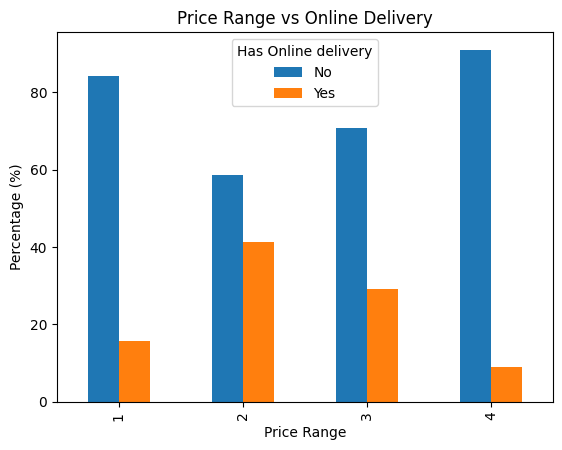

In [11]:
online_price.pivot(
    index='Price range',
    columns='Has Online delivery',
    values='Percentage'
).plot(kind='bar')

plt.title('Price Range vs Online Delivery')
plt.xlabel('Price Range')
plt.ylabel('Percentage (%)')
plt.show()


# **Table Booking**

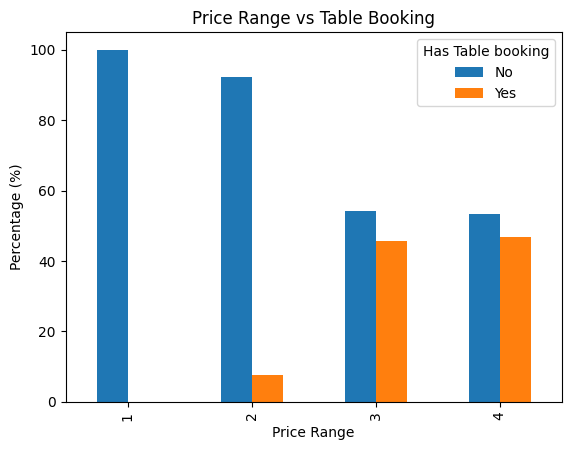

In [12]:
table_price.pivot(
    index='Price range',
    columns='Has Table booking',
    values='Percentage'
).plot(kind='bar')

plt.title('Price Range vs Table Booking')
plt.xlabel('Price Range')
plt.ylabel('Percentage (%)')
plt.show()


This analysis examined the relationship between restaurant price range and service availability. The results show that online delivery is more common among lower-priced restaurants, while higher-priced restaurants are more likely to provide table booking services, indicating a focus on dine-in experiences.

# **Task 3 - Restaurant Reviews Analysis**

In [13]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# **Rating Text Distribution**

In [18]:
df['Rating text'].value_counts()


,count
Rating text,
Average,3737
Not rated,2148
Good,2100
Very Good,1079
Excellent,301
Poor,186


# **Average Votes per Rating Category**

In [19]:
df.groupby('Rating text')['Votes'].mean().sort_values(ascending=False)

,Votes
Rating text,
Excellent,851.770764
Very Good,520.458758
Good,229.351429
Poor,90.715054
Average,48.249130
Not rated,0.870112


In the absence of textual reviews, rating text categories were analyzed to understand customer sentiment. Higher rating categories generally received higher average votes, indicating stronger customer engagement.